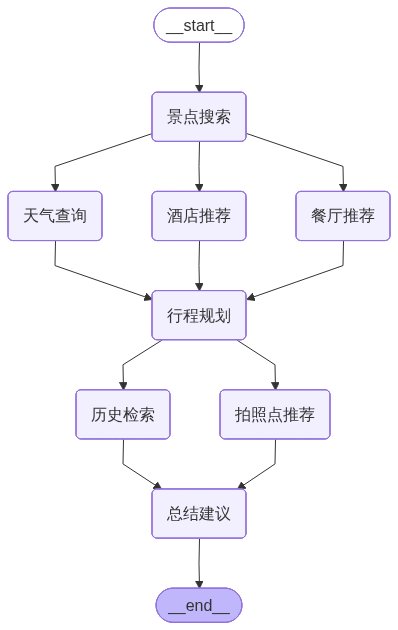

In [1]:
# 构建图结构

from IPython.display import Image, display
from langgraph.graph import START, END, StateGraph
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import MessagesState # 追加到消息列表 以 MessagesState 作为状态来传递 可以点进去看看样子
from node import ( # 导入节点函数 从 node.py 文件中导入
    attraction_search_node,
    weather_query_node,
    hotel_recommendation_node,
    restaurant_recommendation_node,
    itinerary_planning_node,
    history_retrieval_node,
    photo_spot_recommendation_node,
    summary_suggestion_node,

)

builder = StateGraph(MessagesState)
builder.add_node("景点搜索", attraction_search_node)
builder.add_node("天气查询", weather_query_node)
builder.add_node("酒店推荐", hotel_recommendation_node)
builder.add_node("餐厅推荐", restaurant_recommendation_node)
builder.add_node("行程规划", itinerary_planning_node)
builder.add_node("历史检索", history_retrieval_node)
builder.add_node("拍照点推荐", photo_spot_recommendation_node)
builder.add_node("总结建议", summary_suggestion_node)

builder.add_edge(START, "景点搜索")
builder.add_edge("景点搜索", "天气查询")
builder.add_edge("景点搜索", "酒店推荐")
builder.add_edge("景点搜索", "餐厅推荐")
builder.add_edge(["天气查询", "酒店推荐","餐厅推荐"], "行程规划")
builder.add_edge("行程规划", "历史检索")
builder.add_edge("行程规划", "拍照点推荐")
builder.add_edge(["历史检索", "拍照点推荐"], "总结建议")
builder.add_edge("总结建议", END)

graph = builder.compile()
display(Image(graph.get_graph(xray=1).draw_mermaid_png()))
